In [74]:
# Importing dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import seaborn as sns



In [90]:
airline_data = pd.read_csv("Data.csv")
airline_data.head()

,YEAR,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,...,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,airline_name,Description,Code.y
0,2018,1,1/9/18 00:00,AS,498,14057,12892,-13.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
1,2018,1,1/9/18 00:00,AS,502,14057,12892,-12.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
2,2018,1,1/9/18 00:00,AS,532,14057,14679,-5.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
3,2018,1,1/9/18 00:00,AS,540,14057,12892,-11.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
4,2018,1,1/9/18 00:00,AS,544,14057,12892,-6.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX


In [91]:
# Determining the shape of dataset
print(airline_data.dtypes)
airline_data.shape

YEAR                     int64
MONTH                    int64
FL_DATE                 object
OP_UNIQUE_CARRIER       object
OP_CARRIER_FL_NUM        int64
ORIGIN_AIRPORT_ID        int64
DEST_AIRPORT_ID          int64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELAY_GROUP        float64
CANCELLED                int64
CANCELLATION_CODE       object
DIVERTED                 int64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
airline_name            object
Description             object
Code.y                  object
dtype: object


(2359976, 26)

In [92]:
null_counts = airline_data.isnull().sum()
print(null_counts)


YEAR                         0
MONTH                        0
FL_DATE                      0
OP_UNIQUE_CARRIER            0
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
DEST_AIRPORT_ID              0
DEP_DELAY                45474
DEP_DELAY_NEW            45474
DEP_DEL15                45474
DEP_DELAY_GROUP          45474
ARR_DELAY                51526
ARR_DELAY_NEW            51526
ARR_DEL15                51526
ARR_DELAY_GROUP          51526
CANCELLED                    0
CANCELLATION_CODE      2313116
DIVERTED                     0
CARRIER_DELAY          1916035
WEATHER_DELAY          1916035
NAS_DELAY              1916035
SECURITY_DELAY         1916035
LATE_AIRCRAFT_DELAY    1916035
airline_name                 0
Description                  0
Code.y                       0
dtype: int64


In [77]:
max_cancelled = airline_data['CANCELLED'].max()
min_cancelled = airline_data['CANCELLED'].min()
max_diverted = airline_data['DIVERTED'].max()
min_diverted = airline_data['DIVERTED'].min()

print("Max CANCELLED:", max_cancelled)
print("Min CANCELLED:", min_cancelled)
print("Max DIVERTED:", max_diverted)
print("Min DIVERTED:", min_diverted)

Max CANCELLED: 1
Min CANCELLED: 0
Max DIVERTED: 1
Min DIVERTED: 0


In [78]:
cancelled_count = airline_data['CANCELLED'].value_counts().get(1, 0)

diverted_count = airline_data['DIVERTED'].value_counts().get(1, 0)

print("Number of rows = 1:", cancelled_count)
print("Number of rows = 1:", diverted_count)

Number of rows = 1: 46860
Number of rows = 1: 4667


In [94]:
subset_data = ["ORIGIN_AIRPORT_ID", "Description", "Code.y",  "OP_UNIQUE_CARRIER",
               "airline_name", "YEAR", "MONTH", "FL_DATE", "OP_CARRIER_FL_NUM",
               "DEST_AIRPORT_ID", "DEP_DELAY","ARR_DELAY", "CANCELLED", "DIVERTED"]

# subset_data = airline_data.loc[:, subset_data]

,ORIGIN_AIRPORT_ID,Description,Code.y,OP_UNIQUE_CARRIER,airline_name,YEAR,MONTH,FL_DATE,OP_CARRIER_FL_NUM,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED
0,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,498,12892,-13.0,-46.0,0,0
1,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,502,12892,-12.0,-2.0,0,0
2,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,532,14679,-5.0,-8.0,0,0
3,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,540,12892,-11.0,-23.0,0,0
4,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,544,12892,-6.0,12.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359971,12191,"Houston, TX: William P Hobby",HOU,F9,Frontier,2022,7,7/28/22 00:00,1941,12889,173.0,165.0,0,0
2359972,12191,"Houston, TX: William P Hobby",HOU,F9,Frontier,2022,7,7/29/22 00:00,1338,13204,120.0,119.0,0,0
2359973,12191,"Houston, TX: William P Hobby",HOU,F9,Frontier,2022,7,7/29/22 00:00,1939,12889,41.0,33.0,0,0
2359974,12191,"Houston, TX: William P Hobby",HOU,F9,Frontier,2022,7,7/30/22 00:00,1338,13204,36.0,44.0,0,0


In [96]:
# Checking min/max values in all columns
airline_data.describe()
# Checking min/max values in all columns
airline_data.describe()


,YEAR,MONTH,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,2.359976e+06,2.359976e+06,2.359976e+06,2.359976e+06,2.359976e+06,2.314502e+06,2.314502e+06,2.314502e+06,2.314502e+06,2.308450e+06,2.308450e+06,2.308450e+06,2.308450e+06,2.359976e+06,2.359976e+06,443941.000000,443941.000000,443941.000000,443941.000000,443941.000000
mean,2.019748e+03,6.296430e+00,8.777711e+02,1.297191e+04,1.300940e+04,8.125578e+00,1.248565e+01,1.790994e-01,-3.617495e-02,3.515730e+00,1.290445e+01,1.923117e-01,-2.508163e-01,1.985613e-02,1.977562e-03,17.292633,1.910896,20.538524,0.262431,21.697437
std,1.363459e+00,3.410495e+00,6.871444e+02,1.543660e+03,1.532922e+03,4.198176e+01,4.038674e+01,3.834356e-01,2.167581e+00,4.429626e+01,4.012295e+01,3.941167e-01,2.309937e+00,1.395058e-01,4.442581e-02,48.445608,17.868101,40.467277,4.113304,51.083581
min,2.018000e+03,1.000000e+00,1.000000e+00,1.014000e+04,1.014000e+04,-1.140000e+02,0.000000e+00,0.000000e+00,-2.000000e+00,-1.060000e+02,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.019000e+03,3.000000e+00,3.780000e+02,1.143300e+04,1.161800e+04,-7.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.600000e+01,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.020000e+03,6.000000e+00,7.290000e+02,1.319800e+04,1.320400e+04,-3.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-6.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,10.000000,0.000000,0.000000
75%,2.021000e+03,9.000000e+00,1.185000e+03,1.463500e+04,1.467900e+04,6.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,17.000000,0.000000,25.000000,0.000000,23.000000
max,2.022000e+03,1.200000e+01,7.951000e+03,1.599100e+04,1.599100e+04,1.527000e+03,1.527000e+03,1.000000e+00,1.200000e+01,1.527000e+03,1.527000e+03,1.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,1512.000000,1236.000000,1515.000000,428.000000,1520.000000


In [ ]:
# Calculating total arrival and departure delay to figure out on-time performance
airline_data["ARR_DELAY"].abs() + airline_data["DEP_DELAY"].abs()

In [ ]:
# Creating a new column for total delay
airline_data["TOTAL_DELAY"]= airline_data["ARR_DELAY"].abs() + airline_data["DEP_DELAY"].abs()
airline_data.to_csv("Updated_Data.csv", index=False)

In [ ]:
# Creating a subset of delay times
airline_data[["TOTAL_DELAY", "ARR_DELAY", "DEP_DELAY"]]

In [ ]:
# Calculate the on-time performance for each airline
total_flights = airline_data.shape[0]
on_time_flights = airline_data[(airline_data["DEP_DELAY"] <= 0) & (airline_data["ARR_DELAY"] <= 0)].shape[0]
on_time_performance = (on_time_flights/ total_flights) * 100

In [ ]:
# Calculating # of on-time flights for each airline
on_time_flights = len(airline_data[airline_data["TOTAL_DELAY"] == 0])
print(f"Number of on-time flights: {on_time_flights}")
on_time_flights = airline_data[airline_data["TOTAL_DELAY"] == 0].groupby("airline_name").size()
print(on_time_flights)

In [ ]:
# Group data by year and airline, and count the number of on-time flights
on_time_counts = airline_data[airline_data["TOTAL_DELAY"] == 0].groupby(["YEAR", "airline_name"]).size()
# Get unique airlines in the dataset
airlines = airline_data["airline_name"].unique()
# Plot the lines for each airline
for airline in airlines:
    # Select data for the current airline
    airline_counts = on_time_counts.loc[:, airline]
# Plot the line for the current airline
    plt.plot(airline_counts.index.get_level_values("YEAR"), airline_counts.values, label=airline)
plt.xlabel("Year")
plt.ylabel("Number of On-time Flights")
plt.title("Number of On-time Flights vs Year (by Airline)")
plt.legend()
plt.show()

In [ ]:
# Filter on-time flights (TOTAL_DELAY = 0)
on_time_flights = airline_data[airline_data["TOTAL_DELAY"] == 0]
# Count the number of on-time flights per month
monthly_counts = on_time_flights.groupby("YEAR").size()
# Calculate the regression line coefficients
x = monthly_counts.index
y = monthly_counts.values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Month")
plt.ylabel("Number of On-time Flights")
plt.title("Number of On-time Flights vs Month (Scatter Plot)")
plt.plot(x,regress_values,"r-")
plt.show()

In [ ]:
# On time performance for Alaska
airline_code = 'Alaska'
# Filter the dataset for on-time flights of the specific airline
on_time_flights = airline_data[(airline_data['TOTAL_DELAY'] == 0) & (airline_data['airline_name'] == airline_code)]
# Group the data by year and count the number of flights
flight_counts = on_time_flights.groupby('YEAR').size()
# Plot the number of on-time flights for the specific airline per year
flight_counts.plot(kind='bar', figsize=(10, 6))
# Customize the plot
plt.title(f'Number of On-Time Flights for Airline {airline_code} by Year')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
# Show the plot
plt.show()

In [ ]:
# On time performance for Frontier
airline_code = 'Frontier'
# Filter the dataset for on-time flights of the specific airline
on_time_flights = airline_data[(airline_data['TOTAL_DELAY'] == 0) & (airline_data['airline_name'] == airline_code)]
# Group the data by year and count the number of flights
flight_counts = on_time_flights.groupby('YEAR').size()
# Plot the number of on-time flights for the specific airline per year
flight_counts.plot(kind='bar', figsize=(10, 6))
# Customize the plot
plt.title(f'Number of On-Time Flights for Airline {airline_code} by Year')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
# Show the plot
plt.show()

In [ ]:
# On time performance for Spirit
airline_code = 'Spirit'
# Filter the dataset for on-time flights of the specific airline
on_time_flights = airline_data[(airline_data['TOTAL_DELAY'] == 0) & (airline_data['airline_name'] == airline_code)]
# Group the data by year and count the number of flights
flight_counts = on_time_flights.groupby('YEAR').size()
# Plot the number of on-time flights for the specific airline per year
flight_counts.plot(kind='bar', figsize=(10, 6))
# Customize the plot
plt.title(f'Number of On-Time Flights for Airline {airline_code} by Year')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
# Show the plot
plt.show()

In [ ]:
# Calculate the total number of flights for each airline
total_flights = airline_data.groupby('airline_name').size()
# Calculate the number of on-time flights for each airline
on_time_flights = airline_data[airline_data['TOTAL_DELAY'] == 0].groupby('airline_name').size()
# Calculate the percentage of on-time flights for each airline
on_time_percentage = (on_time_flights / total_flights) * 100
# Sort the airlines based on the on-time percentage in descending order
sorted_airlines = on_time_percentage.sort_values(ascending=False)
# Print the airlines with the highest on-time performance
print("Airlines with the highest on-time performance:")
print(sorted_airlines.head())
# Visualize the on-time performance using a bar plot
plt.figure(figsize=(10, 6))
sorted_airlines.plot(kind='bar')
plt.xlabel('Airlines')
plt.ylabel('On-Time Percentage')
plt.title('On-Time Performance of Airlines')
plt.show()

In [ ]:
#emily
# Reduce columns to pertinent information only
df[['OP_UNIQUE_CARRIER', 'airline_name',
       'YEAR', 'MONTH', 'DIVERTED', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
df = df[['OP_UNIQUE_CARRIER', 'airline_name',
       'YEAR', 'MONTH', 'DIVERTED', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
df.dtypes

In [ ]:
# Reduce to only the three following airlines - Alaska, Frontier and Spirit
# condition1 = df['airline_name'] == ('Alaska', 'Frontier', 'Spirit')
condition1 = df ['airline_name'].isin(['Alaska', 'Frontier', 'Spirit'])
filtered_df = df[condition1]

In [ ]:
df = filtered_df
df['airline_name'].unique()
array(['Alaska', 'Frontier', 'Spirit'], dtype=object)
pd.to_datetime(df['YEAR'])
pd.to_datetime(df['MONTH'])

In [ ]:
# .plot(kind='bar')
df[df['CARRIER_DELAY']!=0.0]['airline_name'].value_counts() \
.head(10) \
# .plot(kind='bar')
df[df['WEATHER_DELAY']!=0.0]['airline_name'].value_counts() \
.head() \
# Delays or cancellations coded "NAS" are the type of weather delays that could be reduced with corrective
# action by the airports or the Federal Aviation Administration. NAS_DELAY
df[df['NAS_DELAY']!=0.0]['airline_name'].value_counts() \
.head(10) \
# .plot(kind='bar')

In [ ]:
df[df['SECURITY_DELAY']!=0.0]['airline_name'].value_counts() \
.head(10) \
# .plot(kind='bar')

In [ ]:
# Alaska
x_values = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
y_values = [864283, 812777, 915213, 809775, 860993]
# Plot the values
plt.bar(x_values, y_values,)
plt.xticks(rotation = 'vertical')

In [ ]:
# Add labels and title
plt.xlabel('Type of Delay')
plt.ylabel('Value Count')
plt.title('Alaska Airlines Causes for Delays')
# Display the plot
plt.show()

In [ ]:
# Spirit
x_values = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
y_values = [740596, 682340, 790779, 676922, 719671]
# Plot the values
plt.bar(x_values, y_values)
plt.xticks(rotation = 'vertical')
n, bins, patches = plt.hist(x_values)
# Choose a colormap
colormap = plt.cm.get_cmap('cool')


In [ ]:
# Set gradient colors to the patches
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for patch, color in zip(patches, colormap(bin_centers)):
    patch.set_facecolor(color)
# Add labels and title
plt.xlabel('Type of Delay')
plt.ylabel('Value Count')
plt.title('Spirit Airlines Causes for Delays')
# Display the plot
plt.show()

In [ ]:
# Frontier
x_values = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
y_values = [507545, 438062, 510941, 434116, 500572]
# Plot the values
plt.bar(x_values, y_values)
plt.xticks(rotation = 'vertical')
# Add labels and title
plt.xlabel('Type of Delay')
plt.ylabel('Value Count')
plt.title('Frontier Airlines Causes for Delays')
# Display the plot
plt.show()

In [80]:
# Create a mapping from airport ID to name - Ismail's code
airport_id_to_name = subset_data[['ORIGIN_AIRPORT_ID', 'Description']].drop_duplicates().set_index('ORIGIN_AIRPORT_ID')['Description'].to_dict()

# Use the mapping to create new columns with the names of the origin and destination airports
subset_data['ORIGIN_AIRPORT_NAME'] = subset_data['ORIGIN_AIRPORT_ID'].map(airport_id_to_name)
subset_data['DEST_AIRPORT_NAME'] = subset_data['DEST_AIRPORT_ID'].map(airport_id_to_name)

# Create a 'ROUTE_NAME' column
subset_data['ROUTE_NAME'] = subset_data['ORIGIN_AIRPORT_NAME'] + ' to ' + subset_data['DEST_AIRPORT_NAME']


In [81]:
subset_data.head()

,ORIGIN_AIRPORT_ID,Description,Code.y,OP_UNIQUE_CARRIER,airline_name,YEAR,MONTH,FL_DATE,OP_CARRIER_FL_NUM,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,ORIGIN_AIRPORT_NAME,DEST_AIRPORT_NAME,ROUTE_NAME
0,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,498,12892,-13.0,-46.0,0,0,"Portland, OR: Portland International","Los Angeles, CA: Los Angeles International","Portland, OR: Portland International to Los An..."
1,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,502,12892,-12.0,-2.0,0,0,"Portland, OR: Portland International","Los Angeles, CA: Los Angeles International","Portland, OR: Portland International to Los An..."
2,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,532,14679,-5.0,-8.0,0,0,"Portland, OR: Portland International","San Diego, CA: San Diego International","Portland, OR: Portland International to San Di..."
3,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,540,12892,-11.0,-23.0,0,0,"Portland, OR: Portland International","Los Angeles, CA: Los Angeles International","Portland, OR: Portland International to Los An..."
4,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,544,12892,-6.0,12.0,0,0,"Portland, OR: Portland International","Los Angeles, CA: Los Angeles International","Portland, OR: Portland International to Los An..."


In [83]:
subset_data.columns

Index(['ORIGIN_AIRPORT_ID', 'Description', 'Code.y', 'OP_UNIQUE_CARRIER',
       'airline_name', 'YEAR', 'MONTH', 'FL_DATE', 'OP_CARRIER_FL_NUM',
       'DEST_AIRPORT_ID', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'DIVERTED',
       'ORIGIN_AIRPORT_NAME', 'DEST_AIRPORT_NAME', 'ROUTE_NAME'],
      dtype='object')

Routes with the Highest Average Delay:
                                             ROUTE_NAME  Average Delay
1707  Raleigh/Durham, NC: Raleigh-Durham Internation...     888.000000
1377  Ontario, CA: Ontario International to Burbank,...     675.000000
1593  Phoenix, AZ: Phoenix Sky Harbor International ...     400.000000
377   Cleveland, OH: Cleveland-Hopkins International...     217.000000
874   Jacksonville, FL: Jacksonville International t...     144.000000
817   Houston, TX: William P Hobby to Las Vegas, NV:...      79.702703
692   Fort Lauderdale, FL: Fort Lauderdale-Hollywood...      77.166667
378   Cleveland, OH: Cleveland-Hopkins International...      68.000000
755   Green Bay, WI: Green Bay Austin Straubel Inter...      67.666667
697   Fort Lauderdale, FL: Fort Lauderdale-Hollywood...      63.400000


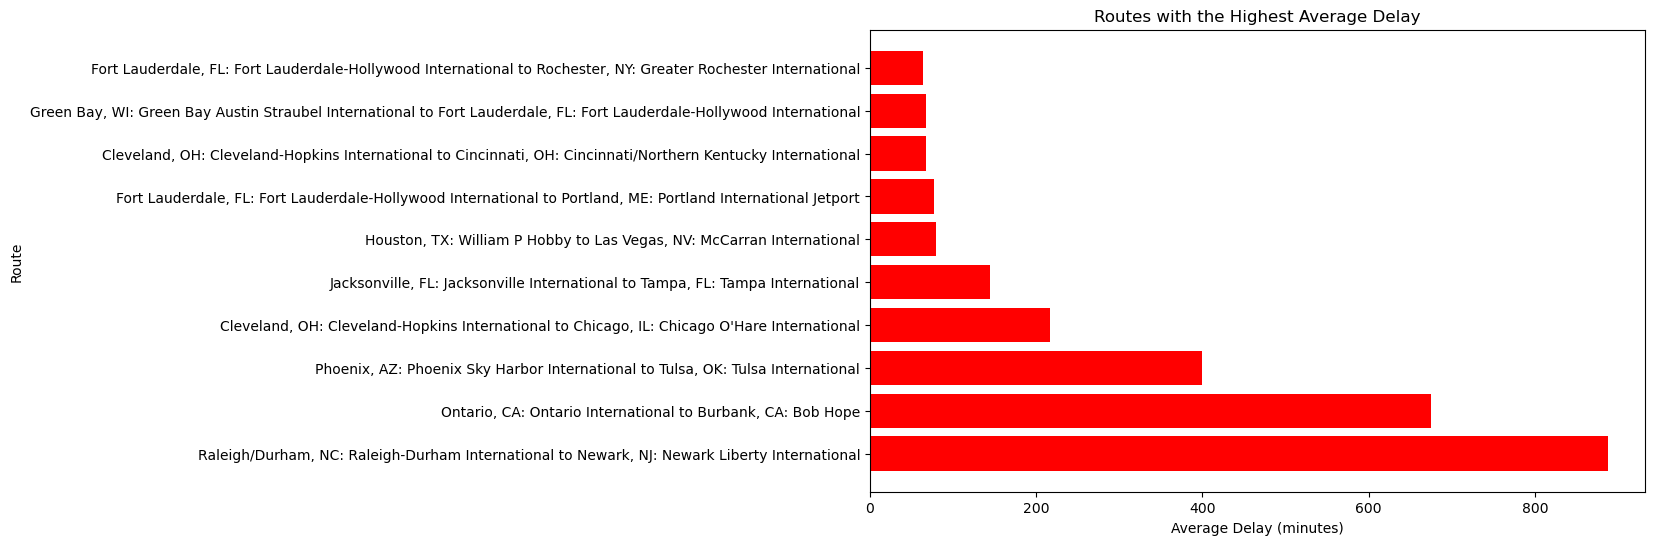

In [85]:
# Calculate average delay by route using airport IDs
route_delay = subset_data.groupby('ROUTE_NAME')['DEP_DELAY'].mean().reset_index(name='Average Delay')

# Sort by average delay in descending order
route_delay = route_delay.sort_values('Average Delay', ascending=False)

# Print the routes with the highest average delay
print("Routes with the Highest Average Delay:")
print(route_delay.head(10))

# Select the top 10 routes with the highest average delay
top_routes = route_delay.head(10)

# Create a bar plot for routes with the highest average delay
plt.figure(figsize=(10, 6))
plt.barh(top_routes['ROUTE_NAME'], top_routes['Average Delay'], color='red')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Route')
plt.title('Routes with the Highest Average Delay')
plt.show()


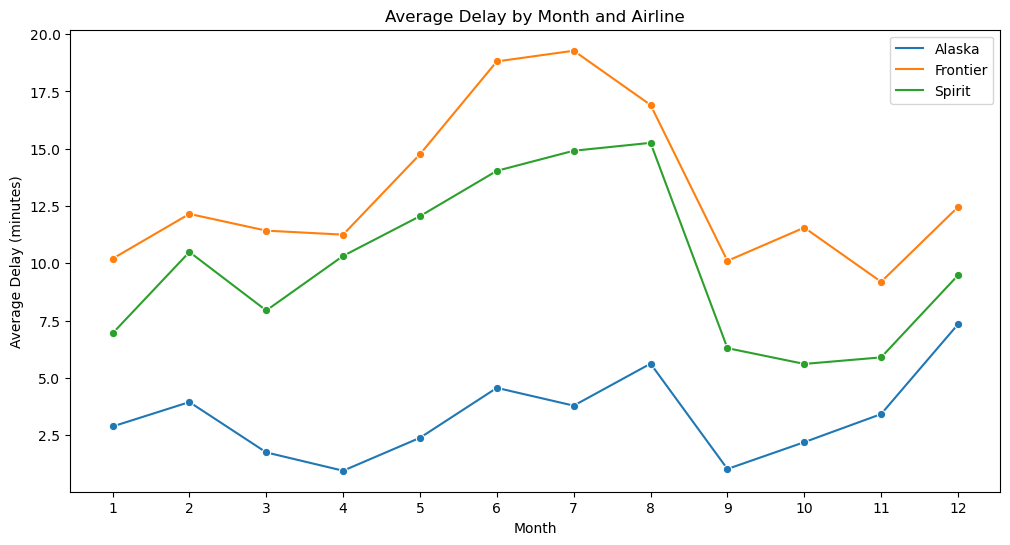

In [87]:
# Calculate average delay by month and airline
monthly_delay = subset_data.groupby(['MONTH', 'airline_name'])['DEP_DELAY'].mean().reset_index(name='Average Delay')

# Create a line plot for average delay by month and airline
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_delay, x='MONTH', y='Average Delay', hue='airline_name', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Month and Airline')
plt.xticks(range(1, 13))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()